In [2]:
import  pandas  as  pd
import  numpy  as  np
import  matplotlib.pyplot  as  plt
import random

## Part C - Logistic Regression - Learning Task 2 - LR2


In [3]:
# for preprocessing dataset. note that it returns a copy of the dataset and doesn't modify the original dataset
def preprocess(df_orig, to_standardize=False):
    df = df_orig.copy()

    # fill na values with mean in each column
    for i, col in enumerate(df.columns[2:]):
        df[col] = df[col].fillna(df[col].mean())

    # standardize data wrt normal distribution, only if, to_standardize variable is set to True
    if to_standardize == True:
        for i, col in enumerate(df.columns[2:]):
            df[col] = (df[col] - df[col].mean())/df[col].std()

    # Setting Malignant as the positive class and Benign as the negative class
    df['diagnosis'] = df['diagnosis'].replace('B', 0)
    df['diagnosis'] = df['diagnosis'].replace('M', 1)

    return df

**Read the data**

In [4]:
np.set_printoptions(suppress=True)
df = pd.read_csv("dataset.csv")

df = preprocess(df, True)
print(df.shape)

target = df.iloc[:, 1]
df = df.drop(['diagnosis','id'], axis=1)
df.head()

(569, 32)


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1.102422,-2.071512,1.268389,0.983510,1.567087,3.280628,2.650837,2.530249,2.215566,2.253764,...,1.885031,-1.358098,2.301575,1.998658,1.306537,2.614365,2.107374,2.294058,2.748204,1.935312
1,1.836635,-0.353322,1.684639,1.907030,-0.826235,-0.486643,-0.025417,0.547662,0.001391,-0.867889,...,1.804340,-0.368879,1.533776,1.887973,-0.375282,-0.430066,-0.147968,1.086129,-0.243675,0.280943
2,1.586206,0.455786,1.565122,1.557513,0.941382,1.052000,1.361666,2.035440,0.938859,-0.397658,...,1.510541,-0.023953,1.346291,1.454016,0.526944,1.081980,0.853340,1.953282,1.151242,0.201214
3,-0.767260,0.253509,-0.595257,-0.763792,3.280667,3.399917,1.913989,1.450431,2.864862,4.906602,...,-0.281217,0.133866,-0.249720,-0.551147,3.391291,3.889975,1.987485,2.173873,6.040726,4.930672
4,1.756953,-1.150804,1.775308,1.824624,0.280125,0.538866,1.369198,1.427237,-0.009552,-0.561956,...,1.297434,-1.465481,1.337363,1.218589,0.220362,-0.313119,0.611645,0.728618,-0.867590,-0.396751


In [5]:
order=[]
for i in range(len(df)):
    order.append(i)


shuffle = random.sample(order, int(len(order) * 0.67))

rem = [i for i in order if i not in shuffle]

In [6]:
X_train = df.iloc[shuffle]
Y_train = target.iloc[shuffle]
X_test = df.iloc[rem]
Y_test = target.iloc[rem]

print(X_train.shape)
print(X_test.shape)

(381, 30)
(188, 30)


In [7]:
def sigmoid_activation(result):
    final_result = 1/(1+np.exp(-result))
    # final_result = 1/(1+np.exp(-result/1e5))
    return final_result

# this will give overflow
# sigmoid_activation(-800)


In [8]:
def compute_accuracy(X_test, Y_test, weights, bias, probability_threshold):
    accuracy = 0
    # weighted sum of inputs / weights
    weighted_sum = np.dot(X_test, weights) + bias
    # activate
    activated_output = sigmoid_activation(weighted_sum)
    # calculate accuracy
    predictions = np.where(activated_output >= probability_threshold, 1, 0)
    accuracy = (predictions == Y_test).mean()

    return accuracy

## Batch Gradient Descent

In [9]:
def batch_gd(X_train, y_train, learning_rate, num_iter,probability_threshold, plot_idx = 1):
    # initialize weights
    weights = np.zeros(X_train.shape[1])
    bias = 0
    max_accuracy = 0
    chkptw = 0
    chkptb = 0
    accuracy = 0
    activated_output = 0
    costs = []
    epsilon = 1e-5
    for i in range(num_iter):
        # weighted sum of inputs / weights
        weighted_sum = np.dot(X_train, weights) + bias
        # activate
        activated_output = sigmoid_activation(weighted_sum)
        # calculate error
        error = y_train - activated_output

        cost = -np.sum((y_train)*np.log(activated_output + epsilon) + (1-y_train)*np.log(1-activated_output + epsilon))
        costs.append(cost)

        # adjust weights
        weights += learning_rate * np.dot(X_train.T, error)
        # adjust bias
        bias += learning_rate * error.sum()
        # calculate accuracy
        predictions = np.where(activated_output >= probability_threshold, 1, 0)
        accuracy = (predictions == y_train).mean()
        if accuracy > max_accuracy:
            max_accuracy = accuracy
            chkptw = weights
            chkptb = bias
    print()
    print("Probability Threshold:", probability_threshold)
    print("Training Data. Max accuracy: {:.5f}".format(max_accuracy))
    # print("Training Data. Accuracy: {:.5f}".format(accuracy))
    plt.subplot(1, 5, plot_idx)
    plt.plot(costs)
    # print("Activated Output", activated_output)
    return chkptw, chkptb

Learning Rate = 0.0001


Probability Threshold: 0.3
Training Data. Max accuracy: 0.97375
Testing Data Accuracy:  0.9627659574468085

Probability Threshold: 0.4
Training Data. Max accuracy: 0.97900
Testing Data Accuracy:  0.9680851063829787

Probability Threshold: 0.5
Training Data. Max accuracy: 0.98425
Testing Data Accuracy:  0.973404255319149

Probability Threshold: 0.6
Training Data. Max accuracy: 0.98425
Testing Data Accuracy:  0.9574468085106383

Probability Threshold: 0.7
Training Data. Max accuracy: 0.97638
Testing Data Accuracy:  0.9521276595744681


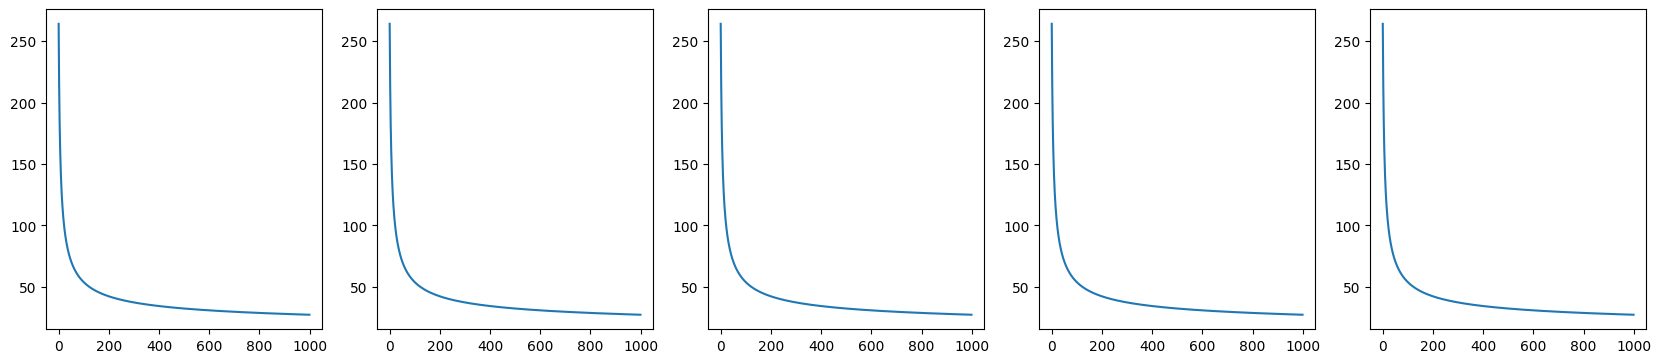

In [15]:
learning_rate = 0.0001
num_iter = 1000
weights, bias = batch_gd(X_train, Y_train, learning_rate, num_iter, probability_threshold=0.3, plot_idx=1)
print("Testing Data Accuracy: ", compute_accuracy(X_test, Y_test, weights, bias, probability_threshold = 0.3))
weights, bias = batch_gd(X_train, Y_train, learning_rate, num_iter, probability_threshold=0.4, plot_idx=2)
print("Testing Data Accuracy: ", compute_accuracy(X_test, Y_test, weights, bias, probability_threshold = 0.4))
weights, bias = batch_gd(X_train, Y_train, learning_rate, num_iter, probability_threshold=0.5, plot_idx=3)
print("Testing Data Accuracy: ", compute_accuracy(X_test, Y_test, weights, bias, probability_threshold = 0.5))
weights, bias = batch_gd(X_train, Y_train, learning_rate, num_iter, probability_threshold=0.6, plot_idx=4)
print("Testing Data Accuracy: ", compute_accuracy(X_test, Y_test, weights, bias, probability_threshold = 0.6))
weights, bias = batch_gd(X_train, Y_train, learning_rate, num_iter, probability_threshold=0.7, plot_idx=5)
print("Testing Data Accuracy: ", compute_accuracy(X_test, Y_test, weights, bias, probability_threshold = 0.7))
fig = plt.gcf()
fig.set_size_inches(20, 4)
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.2, hspace=0.2)

Learning Rate = 0.001


Probability Threshold: 0.3
Training Data. Max accuracy: 0.97900
Testing Data Accuracy:  0.9627659574468085

Probability Threshold: 0.4
Training Data. Max accuracy: 0.98425
Testing Data Accuracy:  0.9787234042553191

Probability Threshold: 0.5
Training Data. Max accuracy: 0.98950
Testing Data Accuracy:  0.9787234042553191

Probability Threshold: 0.6
Training Data. Max accuracy: 0.98950
Testing Data Accuracy:  0.9680851063829787

Probability Threshold: 0.7
Training Data. Max accuracy: 0.98425
Testing Data Accuracy:  0.9574468085106383


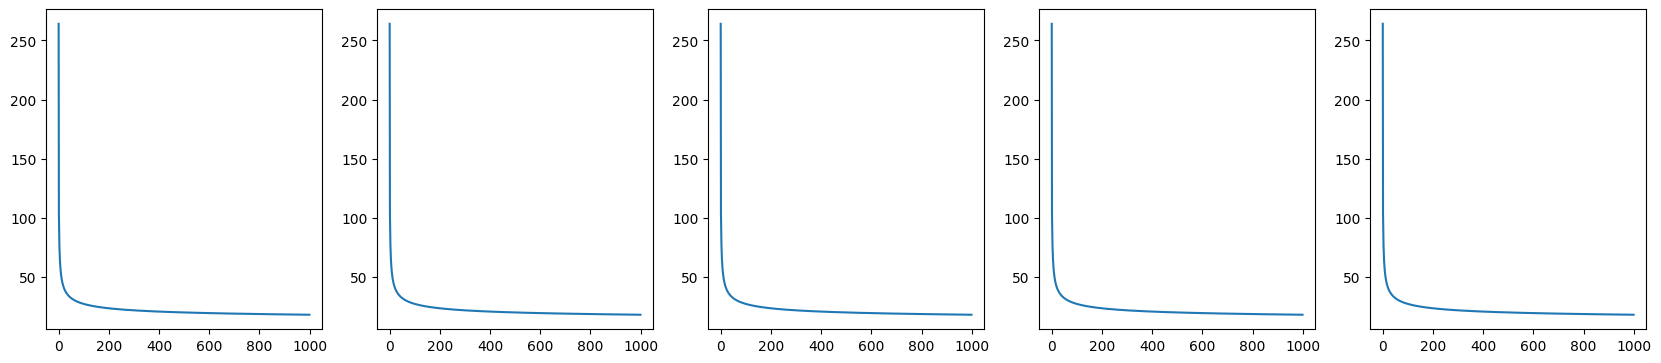

In [16]:
learning_rate = 0.001
num_iter = 1000
weights, bias = batch_gd(X_train, Y_train, learning_rate, num_iter, probability_threshold=0.3, plot_idx=1)
print("Testing Data Accuracy: ", compute_accuracy(X_test, Y_test, weights, bias, probability_threshold = 0.3))
weights, bias = batch_gd(X_train, Y_train, learning_rate, num_iter, probability_threshold=0.4, plot_idx=2)
print("Testing Data Accuracy: ", compute_accuracy(X_test, Y_test, weights, bias, probability_threshold = 0.4))
weights, bias = batch_gd(X_train, Y_train, learning_rate, num_iter, probability_threshold=0.5, plot_idx=3)
print("Testing Data Accuracy: ", compute_accuracy(X_test, Y_test, weights, bias, probability_threshold = 0.5))
weights, bias = batch_gd(X_train, Y_train, learning_rate, num_iter, probability_threshold=0.6, plot_idx=4)
print("Testing Data Accuracy: ", compute_accuracy(X_test, Y_test, weights, bias, probability_threshold = 0.6))
weights, bias = batch_gd(X_train, Y_train, learning_rate, num_iter, probability_threshold=0.7, plot_idx=5)
print("Testing Data Accuracy: ", compute_accuracy(X_test, Y_test, weights, bias, probability_threshold = 0.7))
fig = plt.gcf()
fig.set_size_inches(20, 4)
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.2, hspace=0.2)

Learning Rate = 0.01


Probability Threshold: 0.3
Training Data. Max accuracy: 0.98688
Testing Data Accuracy:  0.9627659574468085

Probability Threshold: 0.4
Training Data. Max accuracy: 0.98688
Testing Data Accuracy:  0.973404255319149

Probability Threshold: 0.5
Training Data. Max accuracy: 0.98950
Testing Data Accuracy:  0.9627659574468085

Probability Threshold: 0.6
Training Data. Max accuracy: 0.98950
Testing Data Accuracy:  0.9574468085106383

Probability Threshold: 0.7
Training Data. Max accuracy: 0.98950
Testing Data Accuracy:  0.9627659574468085


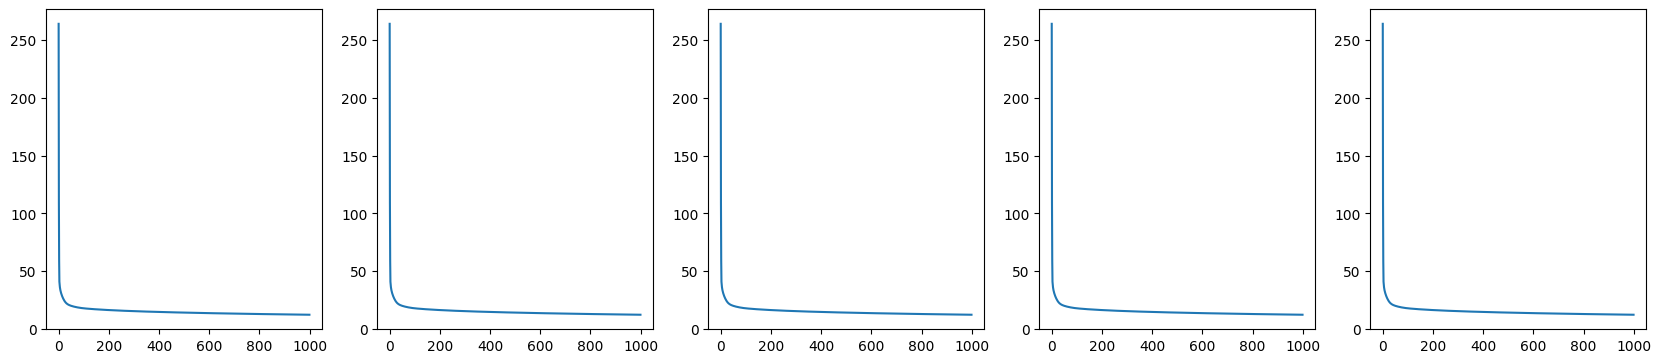

In [18]:
learning_rate = 0.01
num_iter = 1000
weights, bias = batch_gd(X_train, Y_train, learning_rate, num_iter, probability_threshold=0.3, plot_idx=1)
print("Testing Data Accuracy: ", compute_accuracy(X_test, Y_test, weights, bias, probability_threshold = 0.3))
weights, bias = batch_gd(X_train, Y_train, learning_rate, num_iter, probability_threshold=0.4, plot_idx=2)
print("Testing Data Accuracy: ", compute_accuracy(X_test, Y_test, weights, bias, probability_threshold = 0.4))
weights, bias = batch_gd(X_train, Y_train, learning_rate, num_iter, probability_threshold=0.5, plot_idx=3)
print("Testing Data Accuracy: ", compute_accuracy(X_test, Y_test, weights, bias, probability_threshold = 0.5))
weights, bias = batch_gd(X_train, Y_train, learning_rate, num_iter, probability_threshold=0.6, plot_idx=4)
print("Testing Data Accuracy: ", compute_accuracy(X_test, Y_test, weights, bias, probability_threshold = 0.6))
weights, bias = batch_gd(X_train, Y_train, learning_rate, num_iter, probability_threshold=0.7, plot_idx=5)
print("Testing Data Accuracy: ", compute_accuracy(X_test, Y_test, weights, bias, probability_threshold = 0.7))
fig = plt.gcf()
fig.set_size_inches(20, 4)
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.2, hspace=0.2)

## Mini Batch Gradient Descent

In [34]:
def mini_batch_gd(X_train, Y_train, learning_rate, num_iter, batch_size, probability_threshold, plot_idx = 1):
    # initialize weights
    weights = np.zeros(X_train.shape[1])
    bias = 0
    max_accuracy = 0
    chkptw = 0
    chkptb = 0
    accuracy = 0
    activated_output = 0
    costs = []
    epsilon = 1e-5
    nrows = X_train.shape[0]
    choices = np.random.choice(nrows, replace=False, size = batch_size)
    x_train = X_train.iloc[choices]
    y_train = Y_train.iloc[choices]
    for i in range(int(num_iter)):
        # weighted sum of inputs / weights
        weighted_sum = np.dot(x_train, weights) + bias
        # activate
        activated_output = sigmoid_activation(weighted_sum)
        # calculate error
        error = y_train - activated_output

        cost = -np.sum(y_train*np.log(activated_output + epsilon) + (1-y_train)*np.log(1-activated_output + epsilon))
        costs.append(cost)

        # adjust weights
        weights += learning_rate * np.dot(x_train.T, error)
        # adjust bias
        bias += learning_rate * error.sum()
        # calculate accuracy
        predictions = np.where(activated_output >= probability_threshold, 1, 0)
        accuracy = (predictions == y_train).mean()
        if accuracy > max_accuracy:
            max_accuracy = accuracy
            chkptw = weights
            chkptb = bias
        choices = np.random.choice(nrows, replace=False, size = batch_size)
        x_train = X_train.iloc[choices]
        y_train = Y_train.iloc[choices]

    print()
    print("Probability Threshold:", probability_threshold)
    # print("Training Data. Max accuracy: {:.5f}".format(max_accuracy))
    # print("Training Data. Accuracy: {:.5f}".format(accuracy))
    plt.subplot(1, 5, plot_idx)
    plt.plot(costs)
    return chkptw, chkptb

Learning Rate = 0.0001


Probability Threshold: 0.3
Testing Data Accuracy:  0.9361702127659575

Probability Threshold: 0.4
Testing Data Accuracy:  0.9521276595744681

Probability Threshold: 0.5
Testing Data Accuracy:  0.9627659574468085

Probability Threshold: 0.6
Testing Data Accuracy:  0.9680851063829787

Probability Threshold: 0.7
Testing Data Accuracy:  0.9521276595744681


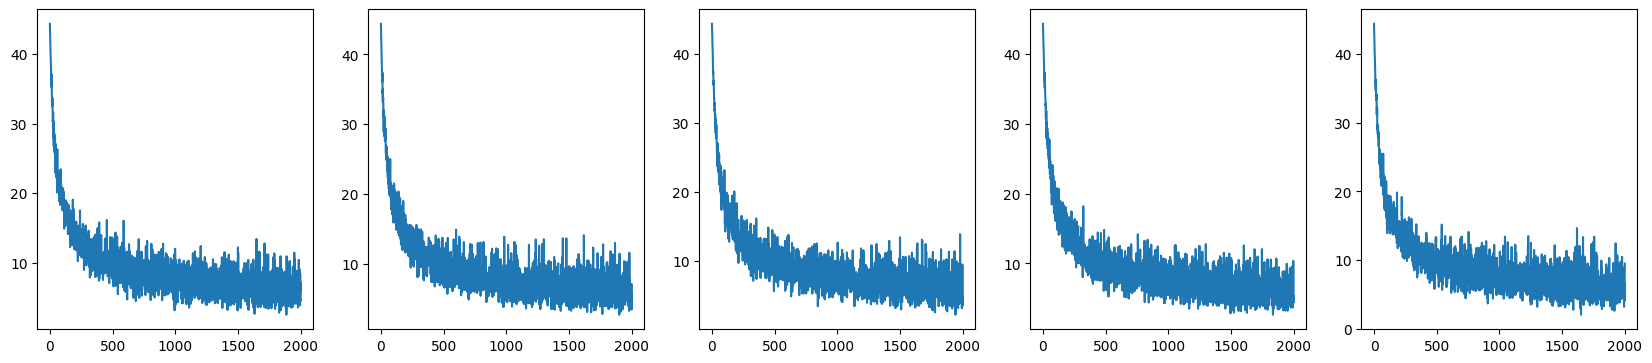

In [35]:
num_iter = 2000
learning_rate = 0.0001
batch_size = 64
weights, bias = mini_batch_gd(X_train, Y_train, learning_rate, num_iter, batch_size, probability_threshold=0.3, plot_idx=1)
print("Testing Data Accuracy: ", compute_accuracy(X_test, Y_test, weights, bias, probability_threshold = 0.3))
weights, bias = mini_batch_gd(X_train, Y_train, learning_rate, num_iter, batch_size, probability_threshold=0.4, plot_idx=2)
print("Testing Data Accuracy: ", compute_accuracy(X_test, Y_test, weights, bias, probability_threshold = 0.4))
weights, bias = mini_batch_gd(X_train, Y_train, learning_rate, num_iter, batch_size, probability_threshold=0.5, plot_idx=3)
print("Testing Data Accuracy: ", compute_accuracy(X_test, Y_test, weights, bias, probability_threshold = 0.5))
weights, bias = mini_batch_gd(X_train, Y_train, learning_rate, num_iter, batch_size, probability_threshold=0.6, plot_idx=4)
print("Testing Data Accuracy: ", compute_accuracy(X_test, Y_test, weights, bias, probability_threshold = 0.6))
weights, bias = mini_batch_gd(X_train, Y_train, learning_rate, num_iter, batch_size, probability_threshold=0.7, plot_idx=5)
print("Testing Data Accuracy: ", compute_accuracy(X_test, Y_test, weights, bias, probability_threshold = 0.7))
fig = plt.gcf()
fig.set_size_inches(20, 4)
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.2, hspace=0.2)


Learning Rate = 0.001


Probability Threshold: 0.3
Testing Data Accuracy:  0.9574468085106383

Probability Threshold: 0.4
Testing Data Accuracy:  0.973404255319149

Probability Threshold: 0.5
Testing Data Accuracy:  0.973404255319149

Probability Threshold: 0.6
Testing Data Accuracy:  0.9787234042553191

Probability Threshold: 0.7
Testing Data Accuracy:  0.9521276595744681


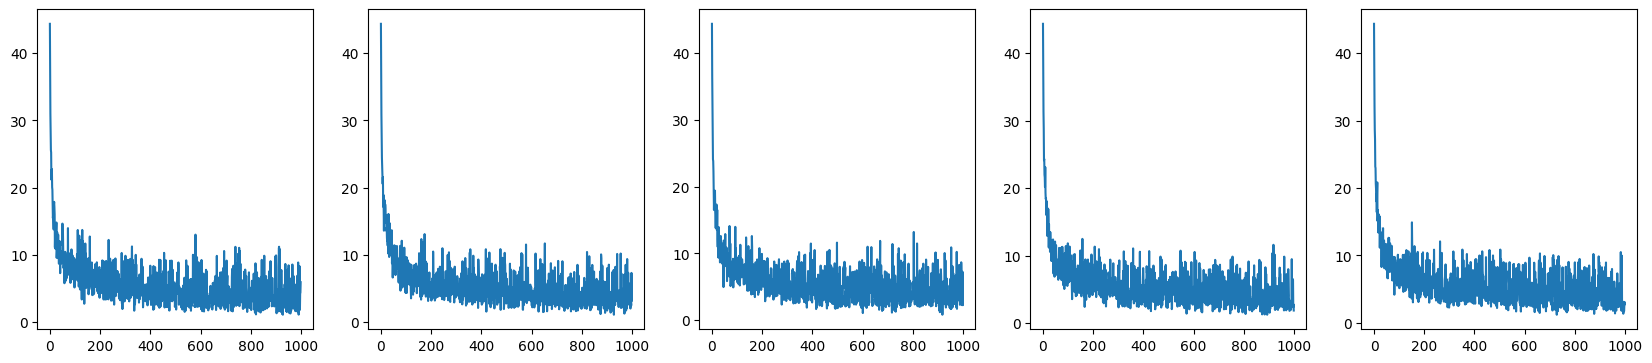

In [36]:
num_iter = 1000
learning_rate = 0.001
batch_size = 64
weights, bias = mini_batch_gd(X_train, Y_train, learning_rate, num_iter, batch_size, probability_threshold=0.3, plot_idx=1)
print("Testing Data Accuracy: ", compute_accuracy(X_test, Y_test, weights, bias, probability_threshold = 0.3))
weights, bias = mini_batch_gd(X_train, Y_train, learning_rate, num_iter, batch_size, probability_threshold=0.4, plot_idx=2)
print("Testing Data Accuracy: ", compute_accuracy(X_test, Y_test, weights, bias, probability_threshold = 0.4))
weights, bias = mini_batch_gd(X_train, Y_train, learning_rate, num_iter, batch_size, probability_threshold=0.5, plot_idx=3)
print("Testing Data Accuracy: ", compute_accuracy(X_test, Y_test, weights, bias, probability_threshold = 0.5))
weights, bias = mini_batch_gd(X_train, Y_train, learning_rate, num_iter, batch_size, probability_threshold=0.6, plot_idx=4)
print("Testing Data Accuracy: ", compute_accuracy(X_test, Y_test, weights, bias, probability_threshold = 0.6))
weights, bias = mini_batch_gd(X_train, Y_train, learning_rate, num_iter, batch_size, probability_threshold=0.7, plot_idx=5)
print("Testing Data Accuracy: ", compute_accuracy(X_test, Y_test, weights, bias, probability_threshold = 0.7))
fig = plt.gcf()
fig.set_size_inches(20, 4)
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.2, hspace=0.2)

Learning Rate = 0.01


Probability Threshold: 0.3
Testing Data Accuracy:  0.9627659574468085

Probability Threshold: 0.4
Testing Data Accuracy:  0.9787234042553191

Probability Threshold: 0.5
Testing Data Accuracy:  0.9787234042553191

Probability Threshold: 0.6
Testing Data Accuracy:  0.973404255319149

Probability Threshold: 0.7
Testing Data Accuracy:  0.9574468085106383


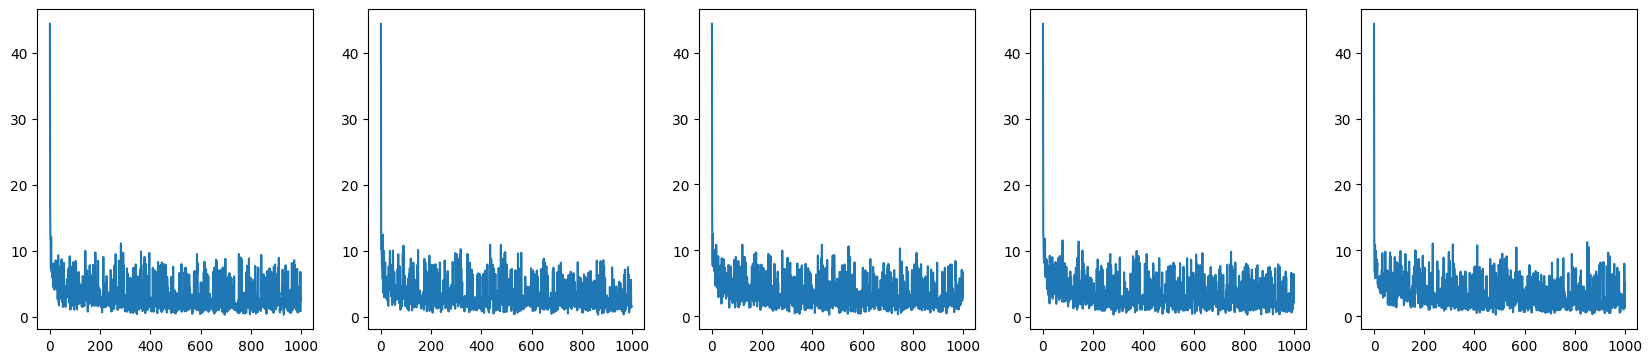

In [39]:
num_iter = 1000
learning_rate = 0.01
batch_size = 64
weights, bias = mini_batch_gd(X_train, Y_train, learning_rate, num_iter, batch_size, probability_threshold=0.3, plot_idx=1)
print("Testing Data Accuracy: ", compute_accuracy(X_test, Y_test, weights, bias, probability_threshold = 0.3))
weights, bias = mini_batch_gd(X_train, Y_train, learning_rate, num_iter, batch_size, probability_threshold=0.4, plot_idx=2)
print("Testing Data Accuracy: ", compute_accuracy(X_test, Y_test, weights, bias, probability_threshold = 0.4))
weights, bias = mini_batch_gd(X_train, Y_train, learning_rate, num_iter, batch_size, probability_threshold=0.5, plot_idx=3)
print("Testing Data Accuracy: ", compute_accuracy(X_test, Y_test, weights, bias, probability_threshold = 0.5))
weights, bias = mini_batch_gd(X_train, Y_train, learning_rate, num_iter, batch_size, probability_threshold=0.6, plot_idx=4)
print("Testing Data Accuracy: ", compute_accuracy(X_test, Y_test, weights, bias, probability_threshold = 0.6))
weights, bias = mini_batch_gd(X_train, Y_train, learning_rate, num_iter, batch_size, probability_threshold=0.7, plot_idx=5)
print("Testing Data Accuracy: ", compute_accuracy(X_test, Y_test, weights, bias, probability_threshold = 0.7))
fig = plt.gcf()
fig.set_size_inches(20, 4)
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.2, hspace=0.2)

## Stochastic Gradient Descent

In [40]:
def stochastic_gd(X_train, Y_train, learning_rate, num_iter, probability_threshold, plot_idx = 1):
    batch_size = 1
    # initialize weights
    weights = np.zeros(X_train.shape[1])
    bias = 0
    max_accuracy = 0
    chkptw = 0
    chkptb = 0
    accuracy = 0
    activated_output = 0
    costs = []
    epsilon = 1e-5
    nrows = X_train.shape[0]
    choices = np.random.choice(nrows, replace=False, size = batch_size)
    x_train = X_train.iloc[choices]
    y_train = Y_train.iloc[choices]
    for i in range(int(num_iter)):
        # weighted sum of inputs / weights
        weighted_sum = np.dot(x_train, weights) + bias
        # activate
        activated_output = sigmoid_activation(weighted_sum)
        # calculate error
        error = y_train - activated_output

        cost = -np.sum(y_train*np.log(activated_output + epsilon) + (1-y_train)*np.log(1-activated_output + epsilon))
        costs.append(cost)

        # adjust weights
        weights += learning_rate * np.dot(x_train.T, error)
        # adjust bias
        bias += learning_rate * error.sum()
        # calculate accuracy
        predictions = np.where(activated_output >= probability_threshold, 1, 0)
        accuracy = (predictions == y_train).mean()
        if accuracy > max_accuracy:
            max_accuracy = accuracy
            chkptw = weights
            chkptb = bias
        choices = np.random.choice(nrows, replace=False, size = batch_size)
        x_train = X_train.iloc[choices]
        y_train = Y_train.iloc[choices]
    print()
    print("Probability Threshold:", probability_threshold)
    # print("Training Data. Max accuracy: {:.5f}".format(max_accuracy))
    # print("Training Data. Accuracy: {:.5f}".format(accuracy))
    plt.subplot(1, 5, plot_idx)
    plt.plot(costs)
    return chkptw, chkptb


Learning Rate = 0.0001


Probability Threshold: 0.3
Testing Data Accuracy:  0.5372340425531915

Probability Threshold: 0.4
Testing Data Accuracy:  0.8457446808510638

Probability Threshold: 0.5
Testing Data Accuracy:  0.9361702127659575

Probability Threshold: 0.6
Testing Data Accuracy:  0.9308510638297872

Probability Threshold: 0.7
Testing Data Accuracy:  0.851063829787234


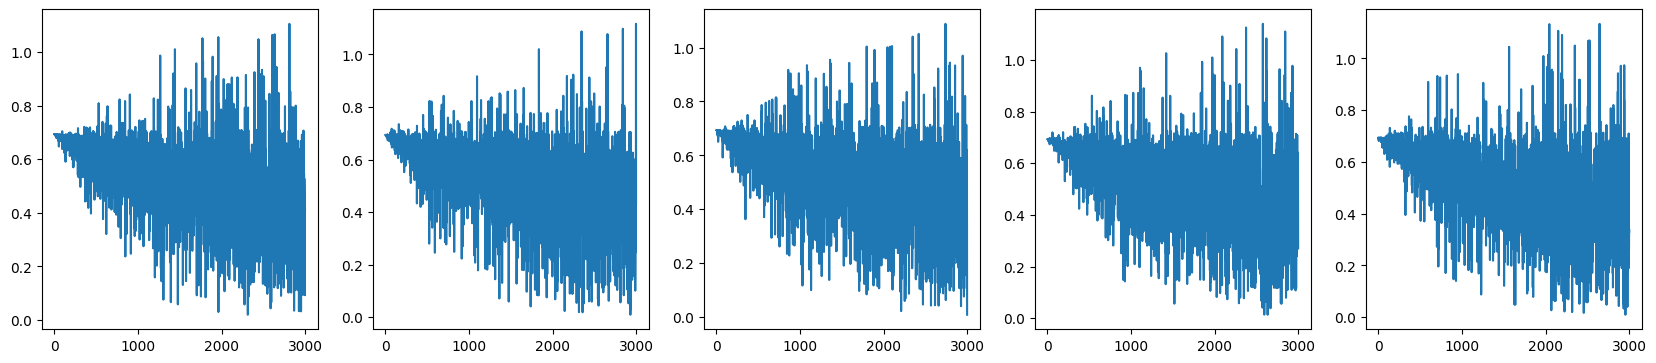

In [41]:
num_iterations = 3000
learning_rate = 0.0001
weights, bias = stochastic_gd(X_train, Y_train, learning_rate, num_iterations, probability_threshold = 0.3, plot_idx=1)
print("Testing Data Accuracy: ", compute_accuracy(X_test, Y_test, weights, bias, probability_threshold = 0.3))
weights, bias = stochastic_gd(X_train, Y_train, learning_rate, num_iterations, probability_threshold = 0.4, plot_idx=2)
print("Testing Data Accuracy: ", compute_accuracy(X_test, Y_test, weights, bias, probability_threshold = 0.4))
weights, bias = stochastic_gd(X_train, Y_train, learning_rate, num_iterations, probability_threshold = 0.5, plot_idx=3)
print("Testing Data Accuracy: ", compute_accuracy(X_test, Y_test, weights, bias, probability_threshold = 0.5))
weights, bias = stochastic_gd(X_train, Y_train, learning_rate, num_iterations, probability_threshold = 0.6, plot_idx=4)
print("Testing Data Accuracy: ", compute_accuracy(X_test, Y_test, weights, bias, probability_threshold = 0.6))
weights, bias = stochastic_gd(X_train, Y_train, learning_rate, num_iterations, probability_threshold = 0.7, plot_idx=5)
print("Testing Data Accuracy: ", compute_accuracy(X_test, Y_test, weights, bias, probability_threshold = 0.7))
fig = plt.gcf()
fig.set_size_inches(20, 4)
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.2, hspace=0.2)

Learning Rate = 0.001


Probability Threshold: 0.3
Testing Data Accuracy:  0.851063829787234

Probability Threshold: 0.4
Testing Data Accuracy:  0.9202127659574468

Probability Threshold: 0.5
Testing Data Accuracy:  0.9361702127659575

Probability Threshold: 0.6
Testing Data Accuracy:  0.9574468085106383

Probability Threshold: 0.7
Testing Data Accuracy:  0.925531914893617


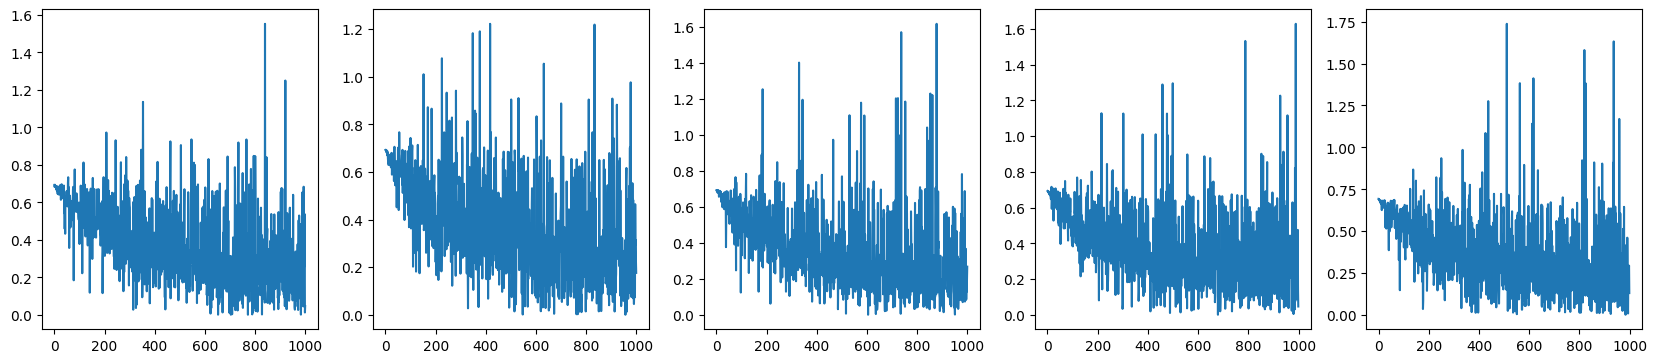

In [42]:
num_iterations = 1000
learning_rate = 0.001
weights, bias = stochastic_gd(X_train, Y_train, learning_rate, num_iterations, probability_threshold = 0.3, plot_idx=1)
print("Testing Data Accuracy: ", compute_accuracy(X_test, Y_test, weights, bias, probability_threshold = 0.3))
weights, bias = stochastic_gd(X_train, Y_train, learning_rate, num_iterations, probability_threshold = 0.4, plot_idx=2)
print("Testing Data Accuracy: ", compute_accuracy(X_test, Y_test, weights, bias, probability_threshold = 0.4))
weights, bias = stochastic_gd(X_train, Y_train, learning_rate, num_iterations, probability_threshold = 0.5, plot_idx=3)
print("Testing Data Accuracy: ", compute_accuracy(X_test, Y_test, weights, bias, probability_threshold = 0.5))
weights, bias = stochastic_gd(X_train, Y_train, learning_rate, num_iterations, probability_threshold = 0.6, plot_idx=4)
print("Testing Data Accuracy: ", compute_accuracy(X_test, Y_test, weights, bias, probability_threshold = 0.6))
weights, bias = stochastic_gd(X_train, Y_train, learning_rate, num_iterations, probability_threshold = 0.7, plot_idx=5)
print("Testing Data Accuracy: ", compute_accuracy(X_test, Y_test, weights, bias, probability_threshold = 0.7))
fig = plt.gcf()
fig.set_size_inches(20, 4)
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.2, hspace=0.2)

Learning Rate = 0.01


Probability Threshold: 0.3
Testing Data Accuracy:  0.9308510638297872

Probability Threshold: 0.4
Testing Data Accuracy:  0.9521276595744681

Probability Threshold: 0.5
Testing Data Accuracy:  0.9627659574468085

Probability Threshold: 0.6
Testing Data Accuracy:  0.9680851063829787

Probability Threshold: 0.7
Testing Data Accuracy:  0.9574468085106383


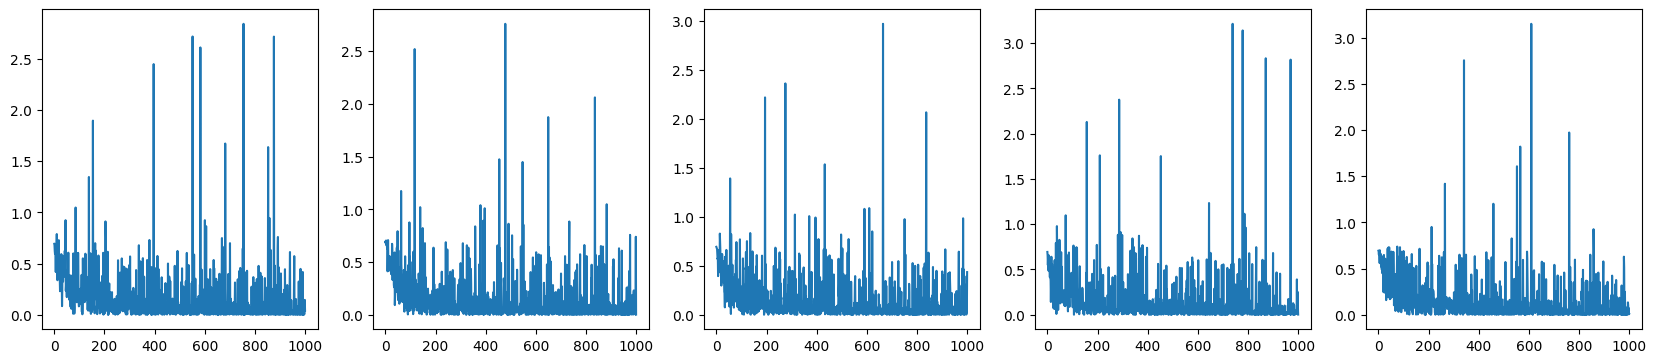

In [43]:
num_iterations = 1000
learning_rate = 0.01
weights, bias = stochastic_gd(X_train, Y_train, learning_rate, num_iterations, probability_threshold = 0.3, plot_idx=1)
print("Testing Data Accuracy: ", compute_accuracy(X_test, Y_test, weights, bias, probability_threshold = 0.3))
weights, bias = stochastic_gd(X_train, Y_train, learning_rate, num_iterations, probability_threshold = 0.4, plot_idx=2)
print("Testing Data Accuracy: ", compute_accuracy(X_test, Y_test, weights, bias, probability_threshold = 0.4))
weights, bias = stochastic_gd(X_train, Y_train, learning_rate, num_iterations, probability_threshold = 0.5, plot_idx=3)
print("Testing Data Accuracy: ", compute_accuracy(X_test, Y_test, weights, bias, probability_threshold = 0.5))
weights, bias = stochastic_gd(X_train, Y_train, learning_rate, num_iterations, probability_threshold = 0.6, plot_idx=4)
print("Testing Data Accuracy: ", compute_accuracy(X_test, Y_test, weights, bias, probability_threshold = 0.6))
weights, bias = stochastic_gd(X_train, Y_train, learning_rate, num_iterations, probability_threshold = 0.7, plot_idx=5)
print("Testing Data Accuracy: ", compute_accuracy(X_test, Y_test, weights, bias, probability_threshold = 0.7))
fig = plt.gcf()
fig.set_size_inches(20, 4)
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.2, hspace=0.2)